# Data_challenge -biotech world

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
from pandas import scatter_matrix

In [ ]:
# plt.style.use('bmh')
# plt.style.available

In [ ]:
Summary of data challenge

1) #Class: (2 for benign, 4 for malignant)
   Data balance: benigh/maligant = 2:1
2) remove duplicates
3) change column Bare_Nuclei: convert string to int and replace ? with -1
4) data ---X, target --y
5) split data into train/test (80/20)
6) applied logistic regression and random forest and both gave me good results
7) interpret results

1) Load data
======

    The dataset consists of 699 cells for which you have the following features:
    1. Sample code number: id number 
    2. Clump Thickness: 1 - 10 
    3. Uniformity of Cell Size: 1 - 10 
    4. Uniformity of Cell Shape: 1 - 10 
    5. Marginal Adhesion: 1 - 10 
    6. Single Epithelial Cell Size: 1 - 10 
    7. Bare Nuclei: 1 - 10 
    8. Bland Chromatin: 1 - 10 
    9. Normal Nucleoli: 1 - 10 
    10. Mitoses: 1 - 10 
    11. Class: (2 for benign, 4 for malignant)

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

In [3]:
col_names = ['id','Clump_Thickness',
            'Cell_Size','Cell_Shape',
            'Marginal_Adhesion','SingleEpithelial_Cell_Size',
            'Bare_Nuclei','Bland_Chromatin',
             'Normal_Nucleoli','Mitoses',
            'Class']

In [51]:
raw_data = pd.read_csv(url,header= None)
raw_data.columns = col_names
raw_data.head(2)

,id,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,SingleEpithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


# 2) Remove duplicates
There are duplicate rows and list all of those duplicates below

In [52]:
#raw data's size :(699, 11)
raw_data.shape

# there are duplicates. without duplicates the size:(691, 11)
raw_data.drop_duplicates().shape 

# there are 8 duplicated rows
raw_data.duplicated().sum()

8

In [20]:
# for each id, let's check if it has a unique one record or multiple record
# there are 645 unique ids, and there are 691 unique entire data, meaning some id has multiple records
len(np.unique(raw_data.id))

645

In [15]:
raw_data.loc[raw_data.id.duplicated()].head(3)

,id,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,SingleEpithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
9,1033078,4,2,1,1,2,1,2,1,1,2
30,1070935,3,1,1,1,1,1,2,1,1,2
82,1143978,5,2,1,1,2,1,3,1,1,2


In [16]:
# list an example here to see for one id that include multiple records
raw_data[raw_data.id == 1143978 ]

,id,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,SingleEpithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
81,1143978,4,1,1,2,2,1,2,1,1,2
82,1143978,5,2,1,1,2,1,3,1,1,2


In [ ]:
#Now let's remove duplicate (meaning the same row is duplicate) and analyze data

In [60]:
raw_data.duplicated().sum() # there are 8 rows that are duplicates including id

8

In [61]:
# duplicate rows --raw_data.duplicated()
raw_data.loc[raw_data.duplicated()]

,id,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,SingleEpithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [62]:
raw_data.id.duplicated().sum()

54

In [1]:
# same id can have muliple different records
# raw_data[raw_data.id == 1182404]

In [ ]:
# drop duplicates and inplace the raw_data

In [53]:
raw_data.drop_duplicates(keep = 'first',inplace=True)

In [7]:
raw_data.shape

(691, 11)

In [66]:
raw_data.duplicated().sum()

0

    # After dropping duplicates, then no need to keep id, so get the dataset as data to drop id

In [54]:
data = raw_data.drop('id',axis = 1)
data.shape

(691, 10)

In [22]:
# there are records that are the same, they are from different cell_id, we consider them as different data entries
data.loc[data.duplicated()].head(3)

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,SingleEpithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
28,2,1,1,1,2,1,2,1,1,2
35,2,1,1,1,2,1,2,1,1,2
48,4,1,1,3,2,1,3,1,1,2


# Fillna with median-code to do this

In [ ]:
median_features = numerical_features.dropna().median()
median_features

imputed_features = numerical_features.fillna(median_features)
imputed_features.count()
#imputed by median is more robust to outlier.

# 3) explore the data columns

In [23]:
# check if there are null values in each column
data.isnull().sum()
# solution: no nan values except Bare_Nuclei 

Clump_Thickness               0
Cell_Size                     0
Cell_Shape                    0
Marginal_Adhesion             0
SingleEpithelial_Cell_Size    0
Bare_Nuclei                   0
Bland_Chromatin               0
Normal_Nucleoli               0
Mitoses                       0
Class                         0
dtype: int64

In [37]:
data.describe()

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,SingleEpithelial_Cell_Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,4.426918,3.130246,3.201158,2.824891,3.211288,3.435601,2.882779,1.593343,2.688857
std,2.815861,3.041328,2.959886,2.866552,2.199852,2.442345,3.066298,1.723129,0.951051
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


    # For column Bare_nuclei: it is a string column and with missing value as '?'
    steps: 1) replace '?' with -1
           2) convert string to int

In [97]:
# For Bare_nuclei:
data.Bare_Nuclei.value_counts() 

1     397
10    130
5      30
2      30
3      28
8      20
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [98]:
# so there are unknow ? 
data[data.Bare_Nuclei == "?"].head(2)

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,SingleEpithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2


In [56]:
#another way to change column data.Bare_Nuclei 's ? to np.nan

data.loc[data.Bare_Nuclei == "?",'Bare_Nuclei'] = np.nan

#convert string to float (np.nan has to conver to float, not int)
data['Bare_Nuclei'] = data['Bare_Nuclei'].astype(float)
data['Bare_Nuclei'] =data['Bare_Nuclei'].fillna(-1)

In [ ]:
# fill with -1 so I can plot

In [24]:
# Bare_Nuclei: replace ? with -1
def replace_missing(value):
    if value == '?':
        return -1
    else:
        return int(value)

In [12]:
# replace ? with -1
data.Bare_Nuclei = data.Bare_Nuclei.apply(replace_missing)

In [57]:
data.loc[[23, 40]]

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,SingleEpithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,8,4,5,1,2,NaN,7,3,1,4
40,6,6,6,9,6,NaN,7,8,1,2


In [58]:
data.Bare_Nuclei.value_counts(normalize= True).reset_index()

,index,Bare_Nuclei
0,1.0,0.588148
1,10.0,0.192593
2,5.0,0.044444
3,2.0,0.044444
4,3.0,0.041481
5,8.0,0.029630
6,4.0,0.028148
7,9.0,0.013333
8,7.0,0.011852
9,6.0,0.005926


# Divide data into X and y

    #Map the classes to 0 (benign) and 1 (malignant)
    # change class 2-benign to 0
         class 4- bad to 1


In [61]:
z = {2: 0, 4: 1}
data['Class'] = data['Class'].map(z)

In [172]:
#Divide data into X and y
target = data.Class  # y
X = data.drop('Class', axis = 1) #X

In [173]:
X.shape, target.shape

((691, 9), (691,))

# check the data balance and assign X and y
   #Class: (2 for benign, 4 for malignant)
   Data balance: benigh/maligant = 2:1

In [132]:
target.value_counts() 

2    453
4    238
Name: Class, dtype: int64

In [37]:
y_label = target.value_counts(normalize= True)
y_label

2    0.655222
4    0.344778
Name: Class, dtype: float64

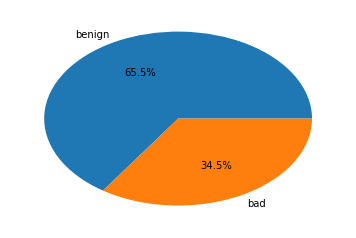

In [39]:
plt.pie(y_label, labels =['benign','bad'], autopct='%1.1f%%' )
plt.show()

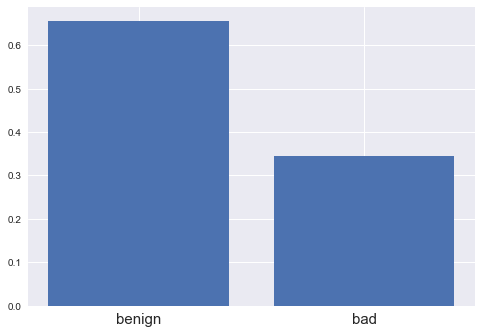

In [283]:
plt.bar(range(2),target.value_counts(normalize= True))
plt.xticks(range(2),['benign','bad'],fontsize = 15)
plt.show()


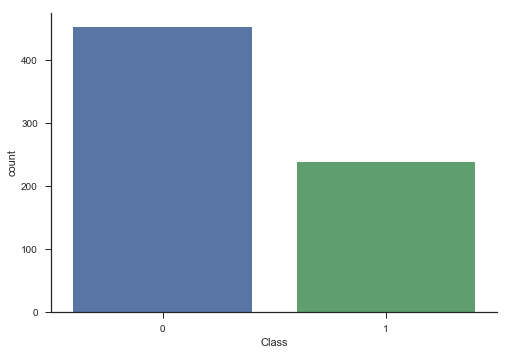

In [216]:
sns.countplot(x='Class',data=data)
sns.despine()

# explore dataset and plot features

In [138]:
feature_names = ['Clump_Thickness',
            'Cell_Size','Cell_Shape',
            'Marginal_Adhesion','SingleEpithelial_Cell_Size',
            'Bare_Nuclei','Bland_Chromatin',
             'Normal_Nucleoli','Mitoses'
            ]
class_0 = data[data.Class == 0] #benign
class_1 = data[data.Class == 1] #bad


# 1. check feature correlation and t-test for each feature on two labels

     result: 
    1) comparing benign and bad in every feature, each of them has a very low p_value(indicating a strong stats significant differences). 
    2) some features are correlated

In [69]:
from scipy import stats

In [86]:
# check feature correlation and t-test for each feature on two labels
tstats_dict = {}
for column in feature_names:
    t_score, p_value = stats.ttest_ind(class_1[column],class_0[column],equal_var = False,nan_policy = 'omit')
    tstats_dict[column] = [t_score,p_value]

tstats_dict

{'Bare_Nuclei': [29.595447673640795, 5.4960209022986711e-87],
 'Bland_Chromatin': [24.881993140688053, 2.2964533300474204e-74],
 'Cell_Shape': [29.542402664944063, 1.9635454359825062e-87],
 'Cell_Size': [28.938878288718826, 4.2793710387065262e-84],
 'Clump_Thickness': [24.157142638872543, 3.1988064000147877e-77],
 'Marginal_Adhesion': [19.876489549766401, 3.2776343043929226e-54],
 'Mitoses': [9.1340045451503649, 2.4760788571104124e-17],
 'Normal_Nucleoli': [20.727463202198486, 3.4131089754963107e-57],
 'SingleEpithelial_Cell_Size': [19.243096368310056, 9.8591506283337103e-53]}

In [109]:
tstats_df = pd.DataFrame(tstats_dict,index =['t_score','p_value'] ) #if only one record per value, you need to add [ ] to make it as a list then to df
tstats = tstats_df.T
#tstats

In [108]:
#df.sort(['a', 'b'], ascending=[True, False])
tstats.sort_values('t_score',ascending= False)

,t_score,p_value
Bare_Nuclei,29.595448,5.496021e-87
Cell_Shape,29.542403,1.963545e-87
Cell_Size,28.938878,4.279371e-84
Bland_Chromatin,24.881993,2.296453e-74
Clump_Thickness,24.157143,3.198806e-77
Normal_Nucleoli,20.727463,3.413109e-57
Marginal_Adhesion,19.876490,3.277634e-54
SingleEpithelial_Cell_Size,19.243096,9.859151e-53
Mitoses,9.134005,2.476079e-17


In [111]:
import seaborn as sns

In [115]:
X.columns

Index([u'Clump_Thickness', u'Cell_Size', u'Cell_Shape', u'Marginal_Adhesion',
       u'SingleEpithelial_Cell_Size', u'Bare_Nuclei', u'Bland_Chromatin',
       u'Normal_Nucleoli', u'Mitoses'],
      dtype='object')

In [117]:
corr.columns

Index([u'Clump_Thickness', u'Cell_Size', u'Cell_Shape', u'Marginal_Adhesion',
       u'SingleEpithelial_Cell_Size', u'Bare_Nuclei', u'Bland_Chromatin',
       u'Normal_Nucleoli', u'Mitoses'],
      dtype='object')

# plot correlation matrix of all numerical features

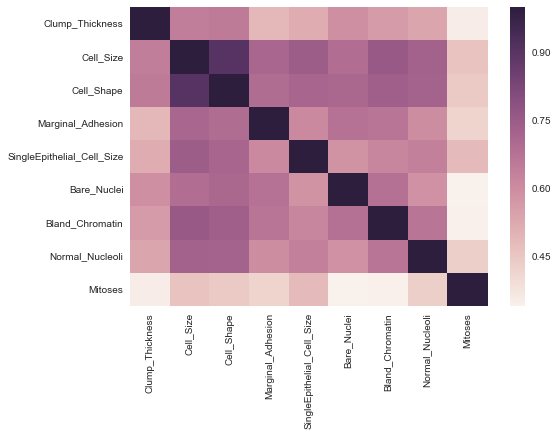

In [118]:
# plot correlation matrix of all features

# show correlations among predictors
corr = X.corr()
sns.heatmap(corr,
            xticklabels= X.columns.values, # has to add.values
            yticklabels = X.columns.values)

plt.show()

# 2. check scatter_matrix or use sns.pairplot(df, hue='cut')

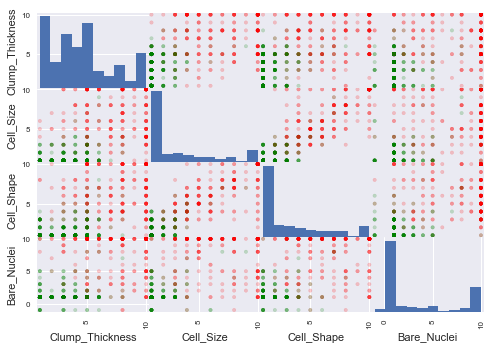

In [239]:
colors = {0:'green', 1:'red'}
scma = scatter_matrix(data[['Clump_Thickness',
            'Cell_Size','Cell_Shape','Bare_Nuclei']],
                c = data['Class'].apply(lambda x:colors[x]),alpha=0.2)

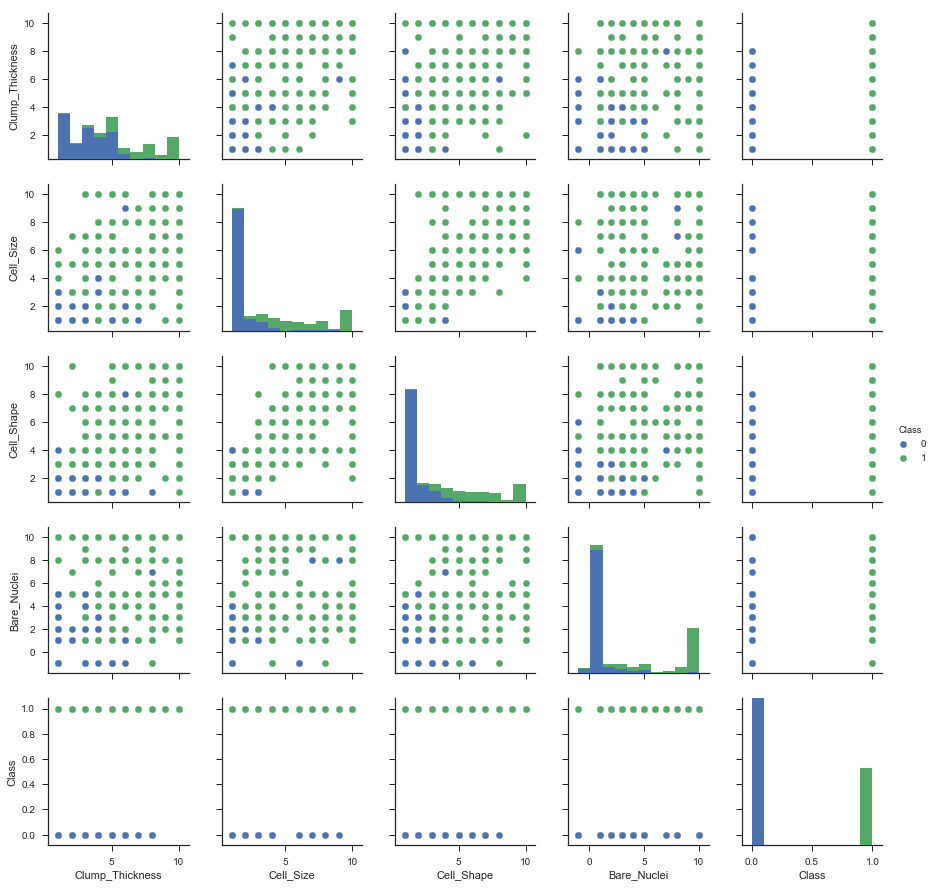

In [221]:
# sns.set(style="ticks")
sns.pairplot(data[['Clump_Thickness',
            'Cell_Size','Cell_Shape','Bare_Nuclei','Class']], hue="Class")
# plt.savefig("1_seaborn_pair_plot.png")

In [ ]:
# plot a box_plot of features

In [ ]:
fig, ax = plt.subplots(3,3,(figsize=(12,15)))

for i, name in enumerate(feature_names):
    ax.subplot(3,3,i+1)
    plt.boxplot([class_0[name],class_1[name]],notch = True, sym = 'b+')
    plt.xlabel(['benign','bad'])
    plt.title(name)

plt.show()

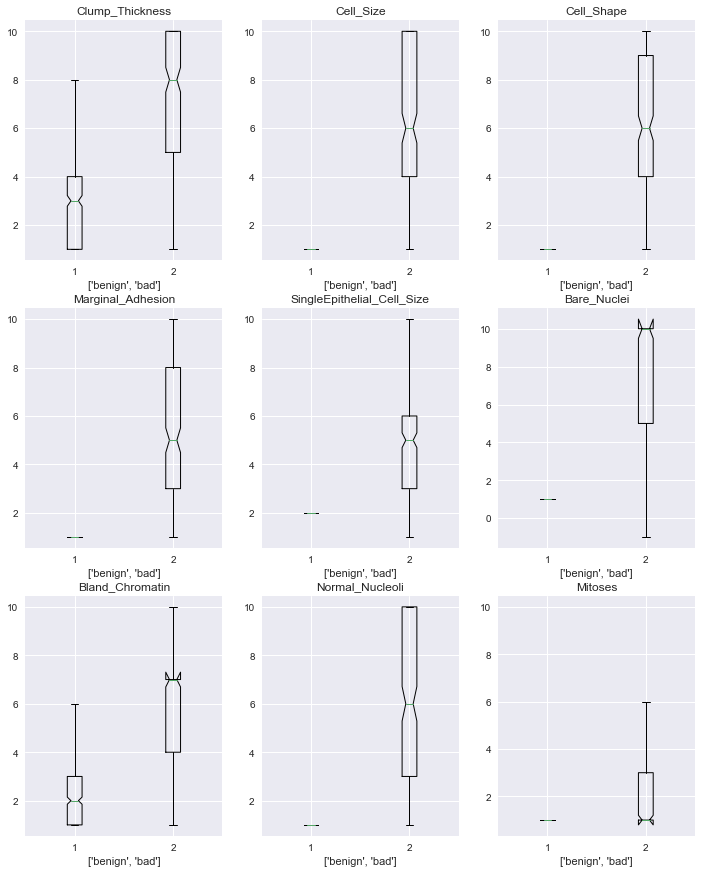

In [158]:
plt.figure(figsize=(12,15))

for i, name in enumerate(feature_names):
    plt.subplot(3,3,i+1)
    plt.boxplot([class_0[name],class_1[name]],notch = True, sym = 'b+')
    plt.xlabel(['benign','bad'])
    plt.title(name)

plt.show()

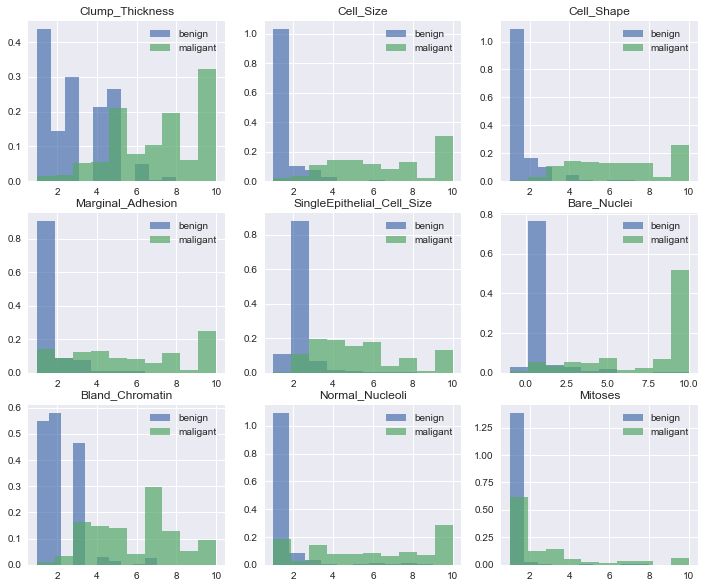

In [148]:
plt.figure(figsize=(12,10))

for i, name in enumerate(feature_names):
    plt.subplot(3,3,i+1)
    plt.hist(class_0[name],bins = 10, normed= True, alpha = 0.7,label ='benign')
    plt.hist(class_1[name], bins = 10, normed= True, alpha = 0.7, label = 'maligant')
    plt.legend(loc ='best')
    plt.title(name)

plt.show()

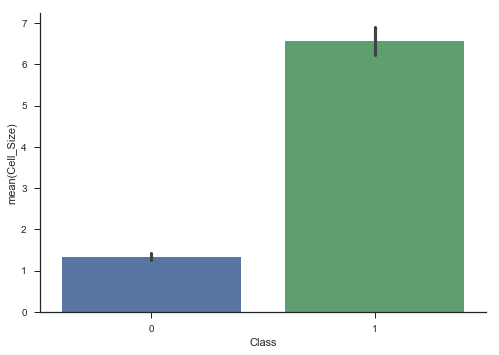

In [217]:
sns.barplot(x='Class', y='Cell_Size', data=data)
sns.despine()

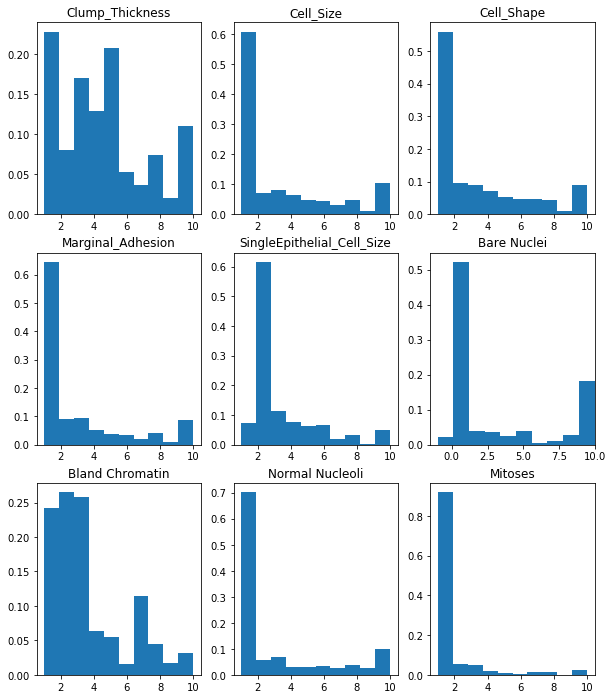

In [126]:
# clump thickness
# plot histogram of it

fig, ((ax1, ax2, ax3), 
      (ax4, ax5,ax6),
     (ax7, ax8, ax9)) = plt.subplots(ncols= 3, nrows= 3, figsize = (10,12))
#ax1-clump thickness
ax1.hist(data.Clump_Thickness, normed= True)
ax1.set_title('Clump_Thickness')

#ax2-Cell_Size
ax2.hist(data.Cell_Size, normed= True)
ax2.set_title('Cell_Size')

#ax3-Cell_Shape
ax3.hist(data.Cell_Shape, normed= True)
ax3.set_title('Cell_Shape')

# ax4- Marginal_Adhesion
ax4.hist(data.Marginal_Adhesion, normed= True)
ax4.set_title('Marginal_Adhesion')

# ax5- SingleEpithelial_Cell_Size
ax5.hist(data.SingleEpithelial_Cell_Size, normed= True)
ax5.set_title('SingleEpithelial_Cell_Size')

# ax6- Bare Nuclei 
ax6.hist(data.Bare_Nuclei, normed= True)
ax6.set_xlim([-1.5, 10])
ax6.set_title('Bare Nuclei')

# ax7- Bland Chromatin
ax7.hist(data.Bland_Chromatin, normed= True)
ax7.set_title('Bland Chromatin')

# ax8 -Normal Nucleoli
ax8.hist(data.Normal_Nucleoli, normed= True)
ax8.set_title('Normal Nucleoli')

# ax9 -Mitoses
ax9.hist(data.Mitoses, normed= True)
ax9.set_title('Mitoses')

plt.show()

In [ ]:
# from plots above, we can see 
 Cell_size, Cell_Shape, Marginal_Adhesion, and Normal Nucleoli
 these four columns are very similar in hist distribution

In [133]:
data.corr().shape

(9, 9)

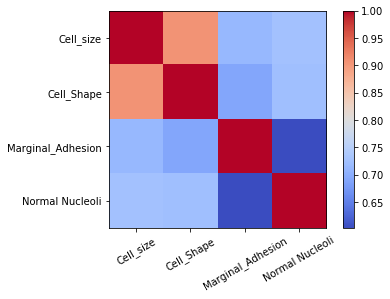

In [195]:
from matplotlib import cm
fig, ax = plt.subplots()

sub = data[['Cell_Size','Cell_Shape','Marginal_Adhesion','Normal_Nucleoli']]
cax = ax.imshow(sub.corr(), interpolation="nearest", cmap=cm.coolwarm)
labels=['Cell_size','Cell_Shape','Marginal_Adhesion','Normal Nucleoli']
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation = 30)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
fig.colorbar(cax)
plt.show()

# Modeling

In [161]:
data.shape, target.shape

((691, 10), (691,))

# 1) split into training and test : 80/20


In [180]:
np.unique(target)

array([2, 4])

In [182]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(target)

target_dict = dict(zip(target.unique(),le.transform(target.unique())))

print ("target encoded label original : converted", target_dict)

target = le.transform(target)


('target encoded label original : converted', {2: 0, 4: 1})


Class: (2 for benign, 4 for malignant)

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.20, random_state=1234)

In [163]:
X_train.shape, X_test.shape

((552, 9), (139, 9))

# Cross validation on X_train using random forest

In [164]:
from sklearn.model_selection import GridSearchCV

In [165]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# build a pipeline imputer first, standardscaler and then classifer

In [167]:
def model_evaluation(X_train, y_train, pipeline, param_grid, cv, scoring):
    model = GridSearchCV(estimator= pipeline, 
                      param_grid= param_grid,
                      cv = cv, 
                      scoring = scoring,
                      n_jobs = 4)
    model.fit(X_train, y_train)
    print ("best score: %.3f" % model.best_score_)
    print ('best Parameters: ', model.best_params_)
    return model   

# Random Forest- model 1

In [175]:
# step 1: imputation:Imputer to replace missing value -1 either to mean or median
imputer = Imputer(missing_values= -1, strategy= 'median')
# step 2: standardScaler
scaler = StandardScaler()
#step 3: classifer
rf = RandomForestClassifier(n_estimators= 100)

pipeline = Pipeline([
        ('imp', imputer),
        ('scaler', scaler),
        ('clf', rf),
            ])

param_grid = {
    'imp__strategy': ['median', 'mean'],
    'clf__n_estimators': [100, 500],    
}

# param_grid = {   
# }

In [177]:
from time import time

start = time()
model = model_evaluation(X_train, y_train, pipeline, param_grid, cv = 3, scoring = 'roc_auc')
print ('this training takes %.2f seconds' %(time()-start))

best score: 0.988
('best Parameters: ', {'imp__strategy': 'mean', 'clf__n_estimators': 500})
this training takes 12.13 seconds


In [178]:
# now after getting the best parameters, use entire training dataset
# step 1: imputation:Imputer to replace missing value -1 either to mean or median
imputer = Imputer(missing_values= -1, strategy= 'mean')

X_train_1 = imputer.fit_transform(X_train)
X_test_1 = imputer.transform(X_test)

# step 2: standardScaler
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_1)
X_test_final = scaler.transform(X_test_1)


X_train_final, X_test_final are data after imputation and standardscaler

In [179]:
X_train_final.shape, X_test_final.shape

((552, 9), (139, 9))

In [200]:
X_train.head(2)

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,SingleEpithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
169,1,1,1,2,1,1,1,1,1
93,1,1,1,1,2,1,2,1,1


In [180]:
# Now train on the X_train_final

rf = RandomForestClassifier(n_estimators= 100)
rf.fit(X_train_final, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [181]:
# plot importance

In [182]:
def plot_rf_importance(feature_importance, feature_name):
    sorted_importance = sorted(zip(feature_importance, feature_name), key = lambda x:x[0], reverse = False)
    sorted_importance = pd.DataFrame(sorted_importance)
    
    #plot the importance in a horizontal bar plot
    x = range(sorted_importance.shape[0])
    y = sorted_importance[0]
    yticks = sorted_importance[1]
    
    fig, ax = plt.subplots()
    ax.barh(x, y , alpha = 0.8, color = 'b')
    ax.set_yticks(x)
    ax.set_yticklabels(yticks)
    plt.show()
    

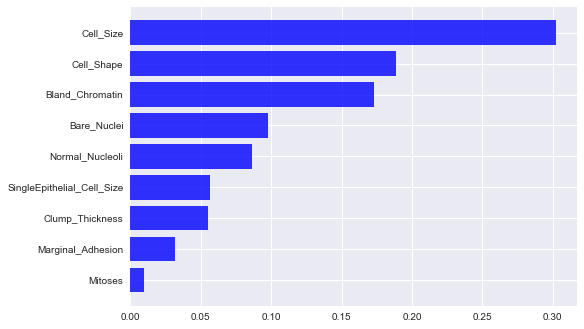

In [183]:
feature_name = data.columns
feature_importance = rf.feature_importances_

plot_rf_importance(feature_importance, feature_name)

In [184]:
data.groupby('Class').mean()

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,SingleEpithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
Class,,,,,,,,,
0,2.964680,1.328918,1.448124,1.368653,2.125828,1.278146,2.097130,1.293598,1.064018
1,7.210084,6.558824,6.537815,5.596639,5.277311,7.533613,5.983193,5.907563,2.600840


In [186]:
data.groupby('Class').std()

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,SingleEpithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
Class,,,,,,,,,
0,1.673211,0.912052,1.002244,1.001586,0.919104,1.234599,1.082571,1.064254,0.504720
1,2.424815,2.708540,2.556666,3.200262,2.437140,3.213389,2.278067,3.346367,2.569769


     # Validation-check on Test Dataset-Random Forest
==================================

In [188]:
# use roc_auc as a metric to evaluate on test dataset
y_pred_prob = rf.predict_proba(X_test_final)
y_pred = rf.predict(X_test_final)

In [189]:
from sklearn.metrics import roc_curve, auc

In [190]:
def plot_roc_auc(y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color = 'b', label = 'ROC_AUC is (area) %.2f' %roc_auc)
    plt.xlabel('false positive rate or (1 - Specifity)')
    plt.ylabel('true positive rate or recall')
    # plot a random guess
    plt.plot([0,1],[0,1], 'k--')
    plt.legend(loc = 'best')
    plt.show()
    

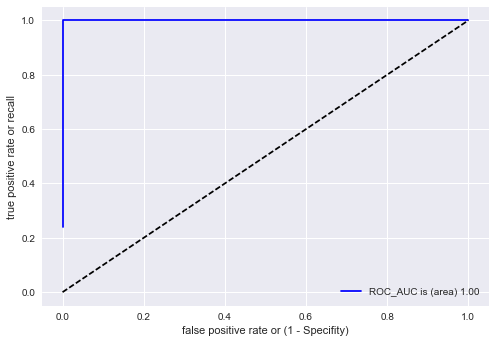

In [191]:
plot_roc_auc(y_test, y_pred_prob)

In [192]:
# use report to evaluate the sample
from sklearn.metrics import classification_report
target_names = ['benign', 'malignant']

In [193]:
print classification_report(y_test, y_pred,target_names= target_names)

             precision    recall  f1-score   support

     benign       1.00      1.00      1.00        97
  malignant       1.00      1.00      1.00        42

avg / total       1.00      1.00      1.00       139



In [281]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
def plot_cm(cm, title ='Confusion Matrix',
           target_names = ['benign','bad']):
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    plt.title(title, fontsize = 15)
    plt.colorbar()
    
    x = range(len(target_names))
    plt.xticks(x, target_names, rotation = 60, fontsize = 12)
    plt.yticks(x, target_names, fontsize = 12)
    plt.ylabel('True Label',fontsize=15)
    plt.xlabel('Predicted Label',fontsize = 15)
    
    
    # Convenience function to adjust plot parameters for a clear layout.
    plt.tight_layout()
    

In [269]:
cm = confusion_matrix(y_test, y_pred)
# do not normalized it , does not make sense--up to you
# normalized can get TPR and TNR, but other two doesn't make sense
cm_normed = 1.00* cm/cm.sum(axis = 1)
cm_normed

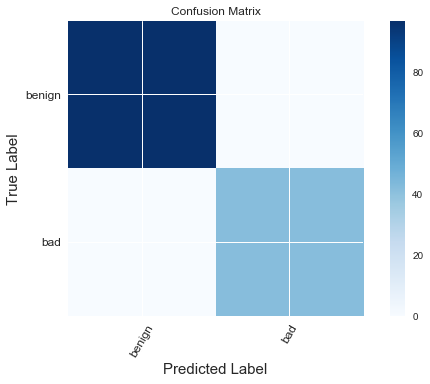

In [279]:
plot_cm(cm)

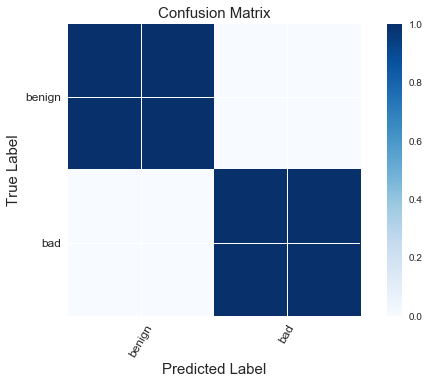

In [282]:
plot_cm(cm_normed)

# Logistic regression

In [195]:
from sklearn.linear_model import LogisticRegression

In [198]:
# step 1: imputation:Imputer to replace missing value -1 either to mean or median
imputer = Imputer(missing_values= -1, strategy= 'median')
# step 2: standardScaler
scaler = StandardScaler()
#step 3: classifer
log = LogisticRegression(penalty= 'l1')

pipeline = Pipeline([
        ('imp', imputer),
        ('scaler', scaler),
        ('clf', log),
            ])

param_grid = {
    'imp__strategy': ['median', 'mean'],
    'clf__C': [0.1,0.5,0.8],    
}


In [199]:
from time import time

start = time()
model = model_evaluation(X_train, y_train, pipeline, param_grid, cv = 3, scoring = 'roc_auc')
print ('this training takes %.2f seconds' %(time()-start))

best score: 0.993
('best Parameters: ', {'clf__C': 0.5, 'imp__strategy': 'median'})
this training takes 0.39 seconds


In [200]:
# now after getting the best parameters, use entire training dataset
# step 1: imputation:Imputer to replace missing value -1 either to mean or median
imputer = Imputer(missing_values= -1, strategy= 'median')

X_train_1 = imputer.fit_transform(X_train)
X_test_1 = imputer.transform(X_test)

# step 2: standardScaler
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_1)
X_test_final = scaler.transform(X_test_1)


In [201]:
# use logistic regression to run the model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty= 'l1',C= 0.5)
log.fit(X_train_final, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [202]:
y2_pred_prob = log.predict_proba(X_test_final)
y2_pred = log.predict(X_test_final)

In [203]:
feature_name = data.columns
feature_importance = log.coef_[0] # need [0]

In [204]:
sorted_features = sorted(zip(feature_name, feature_importance),key = lambda x: x[1], reverse = True)
sorted_features = pd.DataFrame(sorted_features)
sorted_features

,0,1
0,Bare_Nuclei,1.269033
1,Clump_Thickness,1.220718
2,Bland_Chromatin,0.793574
3,Cell_Shape,0.690836
4,Mitoses,0.627534
5,Marginal_Adhesion,0.486470
6,Normal_Nucleoli,0.413143
7,Cell_Size,0.300014
8,SingleEpithelial_Cell_Size,0.017048


lasso regression


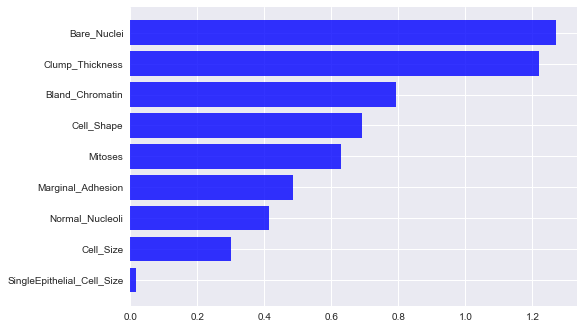

In [205]:
print('lasso regression')
plot_rf_importance(feature_importance, feature_name)

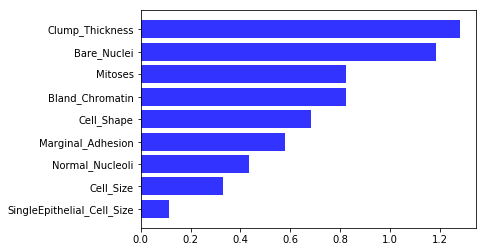

In [238]:
print('ridge regression')
plot_rf_importance(feature_importance, feature_name)

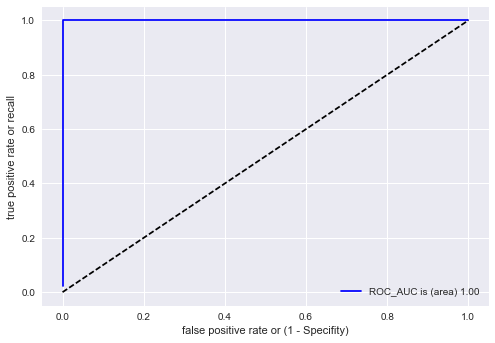

In [206]:
plot_roc_auc(y_test, y2_pred_prob)

In [207]:
print classification_report(y_test, y_pred, target_names = ['benign','bad'])

             precision    recall  f1-score   support

     benign       1.00      1.00      1.00        97
        bad       1.00      1.00      1.00        42

avg / total       1.00      1.00      1.00       139

